# ML Models On Cleaned DataSet

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv(r'E:\c drive\Downloads\proj\CS-ML-master\CS-ML-master\04-Zomato\Dataset\ZomatoIndiaCleaned6.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df2=df.copy()
df2.head(2)

,Restaurant ID,Restaurant Name,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Votes,...,City_New Delhi,City_Noida,City_Pune,City_Secunderabad,City_Surat,City_Vellore,City_Vijayawada,City_Vizag,Rating text,Aggregate rating
0,18763512,BarBerry,0.000000,0.000000,1200.0,0.0,0.0,0,3.0,680.0,...,0,0,1,0,0,0,0,0,5,4.7
1,18528478,La Gustosa,73.814681,18.502095,1200.0,0.0,0.0,0,3.0,1484.0,...,0,0,1,0,0,0,0,0,5,4.5


In [2]:
from sklearn.utils import shuffle
df2 = shuffle(df2) #Shuffling the data
df2.head(2)

,Restaurant ID,Restaurant Name,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Votes,...,City_New Delhi,City_Noida,City_Pune,City_Secunderabad,City_Surat,City_Vellore,City_Vijayawada,City_Vizag,Rating text,Aggregate rating
1855,95780,Al Zaara Matbaq Al Mandi,78.424642,17.396994,500.0,0.0,0.0,0,2.0,768.0,...,0,0,0,0,0,0,0,0,3,3.7
2239,3300748,Panino The Sandwich World,79.079527,21.171776,400.0,0.0,1.0,0,2.0,931.0,...,0,0,0,0,0,0,0,0,4,4.1


In [3]:
df2.shape

(2309, 105)

## Let us build a Classification Model for Prediciting the rating of a restaurant.
### Target Value: Rating Text (Values: 1,2,3,4,5)

## My approach is that first I would like to Visualize how each feature is related to the target value and accordingly i'll train my algorithms

## So i built a heat map

In [4]:
cols = ['Average Cost for two', 'Has Table booking', 'Has Online delivery',  'Is delivering now', 'Price range', 'Votes', 'Rating text',]
df2[cols].all() #check for null values

Average Cost for two     True
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Price range              True
Votes                   False
Rating text              True
dtype: bool

In [5]:
df2[cols]=df2[cols].astype(int,inplace=True)
df2[cols].values

array([[500,   0,   0, ...,   2, 768,   3],
       [400,   0,   1, ...,   2, 931,   4],
       [350,   0,   1, ...,   2,  73,   3],
       ...,
       [350,   0,   0, ...,   2,  20,   2],
       [350,   0,   0, ...,   2,   5,   2],
       [500,   0,   1, ...,   2, 191,   3]])

In [6]:
np.corrcoef(df2[cols].values.T)  # Correlation Matrix

array([[ 1.        ,  0.24991826, -0.15103636, -0.10163419,  0.83299028,
         0.35753006,  0.41648816],
       [ 0.24991826,  1.        , -0.009507  ,  0.08230408,  0.20791584,
         0.10151748,  0.1272509 ],
       [-0.15103636, -0.009507  ,  1.        ,  0.2076051 , -0.16214449,
         0.09097296,  0.14694281],
       [-0.10163419,  0.08230408,  0.2076051 ,  1.        , -0.12476777,
         0.0555391 ,  0.08964327],
       [ 0.83299028,  0.20791584, -0.16214449, -0.12476777,  1.        ,
         0.26406754,  0.35011509],
       [ 0.35753006,  0.10151748,  0.09097296,  0.0555391 ,  0.26406754,
         1.        ,  0.39478962],
       [ 0.41648816,  0.1272509 ,  0.14694281,  0.08964327,  0.35011509,
         0.39478962,  1.        ]])

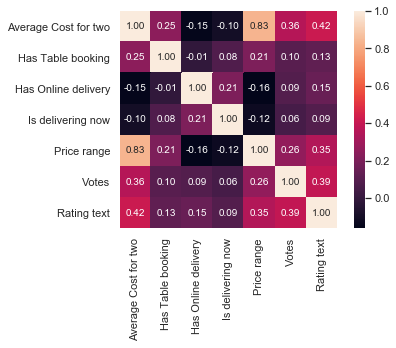

In [31]:
# Heat Map
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['Average Cost for two', 'Has Table booking', 'Has Online delivery',  'Is delivering now', 'Price range', 'Votes', 'Rating text']
cor_matrix = np.corrcoef(df2[cols].values.T) # We transpose to get the data by columns. Columns become rows.
sns.set(font_scale=1)
cor_heat_map = sns.heatmap(cor_matrix,
 cbar=True,
 annot=True,
 square=True,
 fmt='.2f',
 annot_kws={'size':10},
 yticklabels=cols,
 xticklabels=cols)
plt.show()

### From the above Heat map, we can see that the Target Value (Rating text) is correlated well with the 'number of votes', 'price Range' and 'average cost for two', with correlation values being 0.39, 0.35 and 0.42 respectively. 

### We can also draw many other inferences like, Average cost for two and price range has a very high correlation value of 0.83 which says that Average cost for two and price range are highly dependent on each other.

In [8]:
df2['Longitude']=pd.to_numeric(df2['Longitude'])
cols = list(df2.columns.values)
cols.pop(cols.index('Rating text'))
cols.pop(cols.index('Aggregate rating'))
df2 = df2[cols+['Rating text']+['Aggregate rating']]

In [9]:
#df.to_csv(r'E:\c drive\Downloads\proj\CS-ML-master\CS-ML-master\04-Zomato\Dataset\ZomatoIndiaCleaned3.csv',sep='\t',encoding='utf-8', index=False)

In [10]:
df2.iloc[0:1,104]

1855    3.7
Name: Aggregate rating, dtype: float64

In [11]:
x = df2.iloc[:,2:103] #Features
y = df2.iloc[:,104] #Target Value - Rating Text
y=y.fillna(0).astype(int) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 1) # Splitting the Data into Training and Test with test size as 20%

### Let us Start building Machine Learning Models and predict the accuracy score

## Model 1: Decision Tree Classification

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
dtree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 1, max_depth=5, min_samples_leaf=10)
dtree_gini.fit(X_train, y_train)
dtree_gini_pred = dtree_gini.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, dtree_gini_pred)*100)
cm = confusion_matrix(y_test, dtree_gini_pred)
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=dtree_gini_pred)) #Printing the Classification report to view precision, recall and f1 scores 

Decision Tree Accuracy: 71.42857142857143
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           2       0.00      0.00      0.00        17
           3       0.67      0.65      0.66       192
           4       0.73      0.80      0.76       236

    accuracy                           0.71       462
   macro avg       0.60      0.61      0.61       462
weighted avg       0.69      0.71      0.70       462



C:\Users\DR0002TX\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Model 2: Decision Tree With Ada Boost

In [13]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
    n_estimators=60,
    learning_rate=1.5, algorithm="SAMME",random_state=0)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print('Decision Tree with Ada Boost Accuracy:', accuracy_score(y_test, ada_pred)*100)
print(classification_report(y_true=y_test,y_pred=ada_pred))

Decision Tree with Ada Boost Accuracy: 79.87012987012987
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           2       0.12      0.06      0.08        17
           3       0.76      0.78      0.77       192
           4       0.84      0.86      0.85       236

    accuracy                           0.80       462
   macro avg       0.68      0.67      0.67       462
weighted avg       0.79      0.80      0.79       462



## Model 3: Random Forest Classification

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, oob_score=True,random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
print('Random Forest Accuracy:', accuracy*100)
# as normally 64% of training data is used for calculating accuracy in Random Forest, we use OOB (Out-of-bag) score, to use full data 
print('Random Forest Out-of-bag score estimate:', rf.oob_score_*100)
print(classification_report(y_true=y_test,y_pred=rf_pred))

Random Forest Accuracy: 82.46753246753246
Random Forest Out-of-bag score estimate: 84.46128857606931
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           2       0.50      0.06      0.11        17
           3       0.78      0.81      0.79       192
           4       0.85      0.89      0.87       236

    accuracy                           0.82       462
   macro avg       0.77      0.67      0.68       462
weighted avg       0.81      0.82      0.81       462



## Model 4: K Nearest Neighbor Classification

In [15]:
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print('K Nearest Neighbor Accuracy:', accuracy_score(y_test, knn_pred)*100)
print(classification_report(y_true=y_test,y_pred=knn_pred))

K Nearest Neighbor Accuracy: 67.74891774891775
              precision    recall  f1-score   support

           0       0.71      0.59      0.65        17
           2       0.22      0.12      0.15        17
           3       0.63      0.66      0.64       192
           4       0.73      0.74      0.74       236

    accuracy                           0.68       462
   macro avg       0.57      0.53      0.54       462
weighted avg       0.67      0.68      0.67       462



## Model 5: Artificial Neural Networks (Multi Layer Perceptron)

In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(14,14,15),max_iter=500)
mlp.fit(X_train,y_train)
nn_pred = mlp.predict(X_test)
score = accuracy_score(y_test, nn_pred)
print('Artificial Neural Network Accuracy:', score*100)
print(classification_report(y_true=y_test,y_pred=nn_pred))

Artificial Neural Network Accuracy: 66.45021645021644
              precision    recall  f1-score   support

           0       0.44      0.24      0.31        17
           2       0.00      0.00      0.00        17
           3       0.60      0.64      0.62       192
           4       0.73      0.76      0.75       236

    accuracy                           0.66       462
   macro avg       0.44      0.41      0.42       462
weighted avg       0.64      0.66      0.65       462



C:\Users\DR0002TX\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Model 6: SVM Classiifier

In [17]:
from sklearn.svm import SVC
#sklearn.svm.LinearSVC
svc = SVC(random_state = 0)
fitSVC = svc.fit(X_train, y_train)
y_pred = fitSVC.predict(X_test)

#print(confusion_matrix(y_test, y_pred))
print('SVM Accuracy:', accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

C:\Users\DR0002TX\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Accuracy: 78.78787878787878
              precision    recall  f1-score   support

           0       0.85      0.65      0.73        17
           2       1.00      0.12      0.21        17
           3       0.83      0.67      0.74       192
           4       0.76      0.94      0.84       236

    accuracy                           0.79       462
   macro avg       0.86      0.59      0.63       462
weighted avg       0.80      0.79      0.77       462



# Observations:

 1. Data Analysis Showed that **Rating** is dependent on **Average cost of two, Price range** and also number of **Votes**
 2. Correlation Matrix showed that the **Average cost for two** and **Price range** are highly dependent on each other
 3. Correlation Matrix also showed that **Rating text** is correlated well with the number of **Votes, Price Range and Average cost for two**
 4. Of all the 6 Models, the best ones in terms of accuracy are **Descision Tree with Adaptive Boosting** and **Random Forest Classifier**
 5. Future works include: Hyper Parameter Tuning and using other boosting techniques like Xgboost

# Now it's time to do some **Text Mining !!**

In [18]:
import os

import nltk
from nltk.corpus import RegexpTokenizer as regextoken
from nltk.corpus import stopwords
from nltk import FreqDist, bigrams, trigrams
#from nltk import WordNetLemmatizer
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
import gensim
from gensim.models.keyedvectors import KeyedVectors
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Flatten, Embedding, Conv1D, MaxPooling1D, Dropout, LSTM, GRU
from keras.regularizers import l1, l2
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
#I'll use the Review file extracted with Zomato API
zomato = pd.read_csv(r"E:\c drive\Downloads\proj\CS-ML-master\CS-ML-master\04-Zomato\ZomatoExtr5.csv", na_values = ["-", ""],header=None,encoding='utf-8',error_bad_lines=False,sep='\t')
# Making a copy of the data to work on
data = zomato.copy()

Using TensorFlow backend.


In [19]:
data.drop_duplicates(inplace=True)
data.drop(0,inplace=True)
data.drop(3,inplace=True)
data.reset_index(drop=True,inplace=True)
data.rename(columns={0:'reviews'},inplace=True)
data.head()

,reviews
0,Pathetic inedible food served by restaurant. T...
1,"Mukhwas was awesome, and pure. When I visited ..."
2,"While ordering rajma chawal, they delivered Ra..."
3,Authentic cuisine Awesome food. Loved soup...
4,Ordered sweet corn soup but was very pathetic ...


In [20]:
# Converting all the text to lowercase
data["reviews"] = data["reviews"].apply(lambda x: x.lower())

# Creating a regular expression tokenizer that matches only alphabets
# This will return separate words (tokens) from the text
tokenizer = regextoken("[a-zA-Z]+") 
# Applying the tokenizer to each row of the reviews
review_tokens = data["reviews"].apply(tokenizer.tokenize)
# Examining the tokens created for the first row / restaurant
print(review_tokens[0])

['pathetic', 'inedible', 'food', 'served', 'by', 'restaurant', 'the', 'staff', 'was', 'disinterested', 'in', 'the', 'complaints', 'or', 'service']


In [21]:
# Importing and examining the English stopwords directory 
# These are common words that typically don't add meaning to the text and can be removed
stop = stopwords.words("english")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
# Adding custom words to stopwords 
stop.extend(["rated", "n", "nan", "x"])
# Removing stopwords from the tokens
review_tokens = review_tokens.apply(lambda x: [token for token in x if token not in stop])
# Concatenating all the reviews 
all_reviews = review_tokens.astype(str).str.cat()
cleaned_reviews = tokenizer.tokenize(all_reviews)

# Getting the frequency distribution of individual words in the reviews
fd = FreqDist()
for word in cleaned_reviews:
    fd[word] += 1
    
# Examining the top 5 most frequent words
fd.most_common(20)

[('food', 2274),
 ('place', 1910),
 ('good', 1781),
 ('chicken', 1082),
 ('taste', 850),
 ('service', 842),
 ('ordered', 726),
 ('also', 700),
 ('one', 663),
 ('great', 628),
 ('best', 609),
 ('ambience', 585),
 ('amazing', 562),
 ('staff', 554),
 ('really', 536),
 ('restaurant', 531),
 ('try', 520),
 ('pizza', 511),
 ('time', 472),
 ('well', 462)]

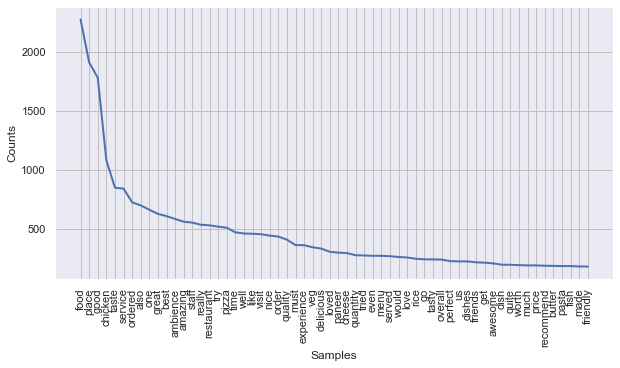

In [23]:
# Plotting the top 50 most frequent words
plt.figure(figsize = (10, 5))
fd.plot(60)
plt.show()

### Observations
Of the 50 most frequent words across customer reviews, six reveal food preferences: **chicken, pizza, veg, paneer, cheese, rice, pasta**. There are **no negative words** in top 50. There are only 2 negative words lying in top 100, viz. **"bad** and **worst"**.

Factors contributing to restaurant experience are mentioned in the following (descending) order of frequency: **place > taste > service > ambience > staff > time > quality > quantity >  menu > friendly > delivery**.

This means that **place** matters a lot to the Foodies...

Now let us repeat the analysis on a bi-gram level. Bi-grams are pairs of words which can provide better context than individual words.

In [24]:
from nltk import bigrams
# Generating bigrams from the reviews
bigrams1 = bigrams(cleaned_reviews)
# Getting the bigram frequency distribution
fd_bigrams = FreqDist()
for bigram in bigrams1:
    fd_bigrams[bigram] += 1
# Examining the top 5 most frequent bigrams
fd_bigrams.most_common(50)

[(('must', 'try'), 188),
 (('good', 'food'), 135),
 (('food', 'good'), 130),
 (('one', 'best'), 119),
 (('good', 'place'), 116),
 (('visit', 'place'), 107),
 (('main', 'course'), 94),
 (('also', 'good'), 93),
 (('food', 'quality'), 91),
 (('really', 'good'), 91),
 (('must', 'visit'), 83),
 (('good', 'service'), 81),
 (('best', 'place'), 80),
 (('non', 'veg'), 76),
 (('ordered', 'chicken'), 75),
 (('value', 'money'), 75),
 (('ice', 'cream'), 71),
 (('butter', 'chicken'), 71),
 (('quality', 'food'), 66),
 (('visited', 'place'), 63),
 (('good', 'taste'), 63),
 (('great', 'place'), 63),
 (('fried', 'rice'), 61),
 (('highly', 'recommended'), 60),
 (('food', 'service'), 59),
 (('nice', 'place'), 59),
 (('chicken', 'tikka'), 58),
 (('service', 'good'), 57),
 (('taste', 'good'), 56),
 (('garlic', 'bread'), 55),
 (('amazing', 'food'), 55),
 (('quality', 'quantity'), 53),
 (('ambience', 'good'), 53),
 (('place', 'good'), 52),
 (('paneer', 'tikka'), 51),
 (('food', 'great'), 50),
 (('food', 'amaz

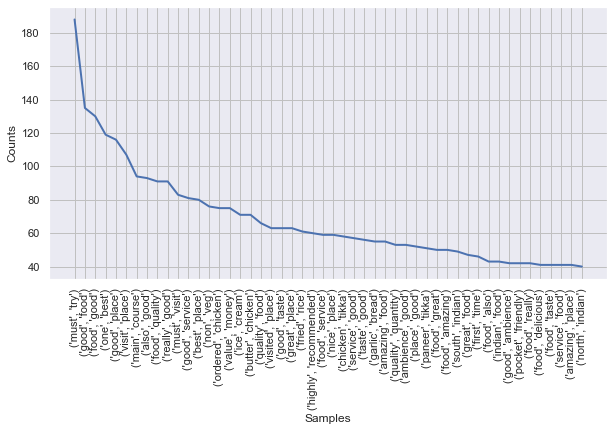

In [25]:
# Plotting the top 50 most frequent bigrams
plt.figure(figsize = (10, 5))
#plt.xticks(rotation=45)
fd_bigrams.plot(50)
plt.show()

### Observations

We have some new insights! Food items/preferences mentioned in the top 50 bigrams are **non veg, ice cream, butter chicken, fried rice, chicken tikka, garlik bread, paneed tikka, south indian, and north indian**. Top five bigrams related to restaurant experience: **must try > good food > good place > good service > value money**


Key insight is: **Food taste is most effective parameter, followed by location of the restaurant, and then service. Another important observalion is that the expense factor, which was missed by individual word frequency counts, was picked up by the bigram frequency counts.**

What about trigrams? 

In [26]:
from nltk import trigrams
# Generating trigrams from the reviews
trigrams1 = trigrams(cleaned_reviews)

fd_trigrams = FreqDist()
for trigram in trigrams1:
    fd_trigrams[trigram] += 1

fd_trigrams.most_common(100)

[(('must', 'visit', 'place'), 30),
 (('must', 'try', 'place'), 20),
 (('veg', 'non', 'veg'), 19),
 (('food', 'good', 'service'), 17),
 (('overall', 'good', 'experience'), 17),
 (('would', 'love', 'visit'), 16),
 (('overall', 'great', 'experience'), 16),
 (('vanilla', 'ice', 'cream'), 16),
 (('north', 'indian', 'food'), 16),
 (('place', 'hangout', 'friends'), 15),
 (('one', 'best', 'place'), 14),
 (('food', 'quality', 'quantity'), 13),
 (('white', 'sauce', 'pasta'), 13),
 (('cheese', 'garlic', 'bread'), 12),
 (('quality', 'quantity', 'food'), 12),
 (('food', 'quality', 'taste'), 12),
 (('one', 'best', 'places'), 12),
 (('south', 'indian', 'food'), 12),
 (('food', 'also', 'good'), 12),
 (('paneer', 'tikka', 'masala'), 11),
 (('good', 'food', 'good'), 11),
 (('food', 'ambience', 'service'), 11),
 (('paneer', 'butter', 'masala'), 11),
 (('must', 'try', 'dish'), 11),
 (('place', 'chill', 'friends'), 11),
 (('place', 'serves', 'best'), 10),
 (('place', 'must', 'visit'), 10),
 (('thin', 'crus

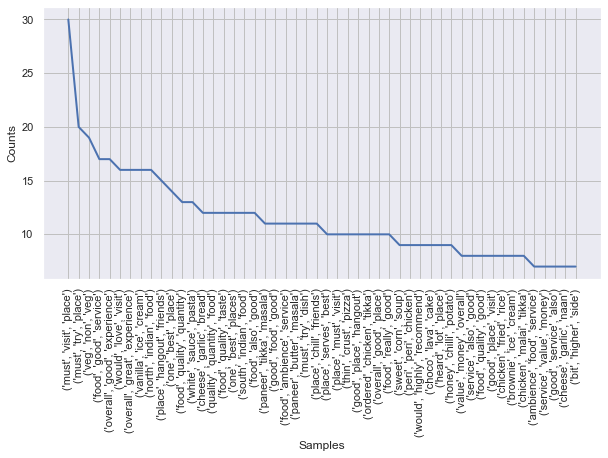

In [27]:
plt.figure(figsize = (10, 5))
fd_trigrams.plot(50)
plt.show()

### Observations
The specific food preferences(descreading order) we can see here are **veg non veg, vanilla ice cream, north indian food, white sauce pasta, cheese garlic bread, south indian food and paneer tikka masala**

On restaurant experience: a specific insight revealed by the trigrams is that **many people are looking for places to hang out with their friends**. 

We also see a variety of positive trigrams like "must try place","food good service", "would love visit", "one best place", "service also good" and "overall good experience".

We now have plenty of insights into customer preferences and experiences, and will move onto an analysis of Bangalore's cuisines.

In [28]:
import pandas as pd
data2=pd.read_csv(r'E:\c drive\Downloads\proj\CS-ML-master\CS-ML-master\04-Zomato\Dataset\MLZomato5.csv')

In [29]:
data2['Cuisines'].head(1)

0    North Indian, Italian, Finger Food
Name: Cuisines, dtype: object

In [30]:
# Creating a new dataset with cuisines info and restaurant ratings
cuisines = data2[["Cuisines", "Rating text"]]
cuisines["Cuisines"] = cuisines["Cuisines"].astype(str)
# Converting to lowercase
cuisines["Cuisines"] = cuisines["Cuisines"].apply(lambda x: x.lower())
# Tokenizing the cuisines
cuisine_tokens = cuisines["Cuisines"].apply(tokenizer.tokenize)
# Concatenating all the cuisine names into one text document
all_cuisines = cuisine_tokens.astype(str).str.cat()
cleaned_cuisines = tokenizer.tokenize(all_cuisines)

# Generating cuisine frequencies 
fd_cuisine = FreqDist()
for cuisine in cleaned_cuisines:
    fd_cuisine[cuisine] += 1
    
# Printing the 50 most common cuisines (top 50)
print(fd_cuisine.most_common(50))

[('indian', 1538), ('north', 1165), ('chinese', 832), ('food', 666), ('continental', 409), ('fast', 405), ('italian', 359), ('south', 299), ('biryani', 229), ('mughlai', 220), ('desserts', 202), ('cafe', 188), ('pizza', 187), ('asian', 157), ('seafood', 144), ('street', 138), ('salad', 120), ('burger', 110), ('beverages', 106), ('american', 96), ('thai', 88), ('mexican', 87), ('finger', 83), ('bakery', 82), ('european', 82), ('momos', 79), ('kebab', 70), ('mithai', 70), ('goan', 62), ('mediterranean', 52), ('rolls', 48), ('ice', 44), ('cream', 44), ('andhra', 43), ('maharashtrian', 41), ('bbq', 40), ('nan', 37), ('lebanese', 35), ('sandwich', 34), ('healthy', 26), ('juices', 26), ('modern', 26), ('arabian', 23), ('japanese', 23), ('hyderabadi', 15), ('tibetan', 15), ('bar', 14), ('mangalorean', 13), ('bengali', 11), ('burmese', 10)]


## Observations
### Here Indian is the first, and North is the second most common Cuisines, but logically that means "North Indian" cuisine is actually the most common one.

### Chinese food also has a strong hold over Indian market.It is the most common non native food type in India.

### Also'Cantonese' is another form of Chinese and so might not really be rare.

### We've done our reviews and cuisines analysis.